Задание Lite

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:

1. Запустите сеть с различными размерами обучающей и проверочной выборок:

Обучающая выборка 50.000 примеров
Обучающая выборка 10.000 примеров
Обучающая выборка 500 примеров
2. Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке. Сделайте сравнительную таблицу.
3. Создайте сеть следующей архитектуры:

4 Dense слоя
Dropout слоя
BatchNormalization слоя
Напишите свои выводы по результатам проведенных тестов.

**В данной домашней работе будет создано, обучено и проанализировано 12 нейронных сетей**.

Домашнее задание получилось большим. Так как много вариантов сети. Старался расписать как можно больше шагов, чтобы проще было проверять. 

In [ ]:
# Подключение всех необходимых библиотек 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd  
%matplotlib inline


## Для начала подготовим данные для обучения

In [ ]:
# Загрузим данные MNIST
(x_train_org, y_train_org),(x_test_org, y_test_org)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Нормализуем входные данные. В промежутке от 0 до 1
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

In [ ]:
# Создадим функцию, которая будеи возвращать пустую сеть. Чтобы далее было меньше одинакого кода.
def createModel():

  # Создаем каркас
  model = Sequential()

  # Добавляем слои
  model.add(Dense(100, input_dim = 784, activation = "relu"))
  model.add(Dense(5000, activation = "relu"))
  model.add(Dense(10,activation = "softmax"))

  # Компилируем сеть
  model.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

  return model # Возвращаем созданную сеть

# Задание 1. Запустите сеть с различными размерами обучающей и проверочной выборок:
  -Обучающая выборка 50.000 примеров

  -Обучающая выборка 10.000 примеров

  -Обучающая выборка 500 примеров

Так как в прошлом задании уровня Ultra Lite мы использовали validation_split в качестве аргумента для разделения на обучающую и проверочные выборки. То в данном задании, зная кол-во примеров для обучающей выборки,можно воспользоваться другим методом. 

А именно явно разделить изначально весь датасет на котором будет учиться нейронная сеть.

И уже использовать validation_data в параметрах обучения.

# Обучающая выборка 50.000 примеров

In [ ]:
n_val = 10000                  # Указываем 10000 примеров в проверочную выборку (60000-50000)
x_len = x_train.shape[0]       # Запоминаем размер всей выборки целиком
print (x_len)

60000


In [ ]:
# Создаем нейронную сеть
model_50000 = createModel()

In [ ]:
# Обучение нейронной сети
history_50000 = model_50000.fit(x_train[:x_len - n_val],        # Берём все до индекса 50000 (60000 - 10000 = 50000)
                               y_train[:x_len - n_val],         # Аналгично правильные ответы до 50000
                               batch_size=128,  epochs=15,
                               # Прямо указываем данные для проверочной выборки
                               # Берём от индекса 50000 до конца = 10000 примеров
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
391/391 [==============================] - 3s 4ms/step - loss: 0.5087 - accuracy: 0.8435 - val_loss: 0.1363 - val_accuracy: 0.9596
Epoch 2/15
391/391 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9644 - val_loss: 0.1059 - val_accuracy: 0.9678
Epoch 3/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9758 - val_loss: 0.0963 - val_accuracy: 0.9722
Epoch 4/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.1091 - val_accuracy: 0.9709
Epoch 5/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0451 - accuracy: 0.9849 - val_loss: 0.0906 - val_accuracy: 0.9747
Epoch 6/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0934 - val_accuracy: 0.9751
Epoch 7/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0874 - val_accuracy: 0.9757
Epoch 

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_50000 = model_50000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_50000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9777
Доля верных ответов на тестовых данных, в процентах: 97.77%


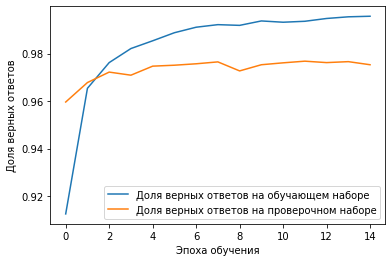

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_50000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_50000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

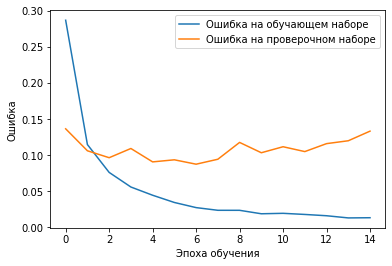

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_50000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_50000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Обучающая выборка 10000 примеров

Аналогичным образом проверим какие показали будут у нейронной сети при обучающей выборке в 10.000 примеров.

  Комментарии убраны, так как алгоритм аналогичный. 
  
  Только изменился размер обучающей выборки. И размер **batch_size** сделаем поменьше, так как обучающая выборка стала меньше в 5 раз.

In [ ]:
n_val = 50000              # Проверочная выборка            
x_len = x_train.shape[0] 

model_10000 = createModel()

history_10000 = model_10000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=30,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
334/334 [==============================] - 4s 12ms/step - loss: 0.6754 - accuracy: 0.7857 - val_loss: 0.2520 - val_accuracy: 0.9222
Epoch 2/15
334/334 [==============================] - 4s 13ms/step - loss: 0.1747 - accuracy: 0.9458 - val_loss: 0.2089 - val_accuracy: 0.9370
Epoch 3/15
334/334 [==============================] - 4s 12ms/step - loss: 0.1055 - accuracy: 0.9677 - val_loss: 0.1879 - val_accuracy: 0.9455
Epoch 4/15
334/334 [==============================] - 4s 12ms/step - loss: 0.0577 - accuracy: 0.9836 - val_loss: 0.2451 - val_accuracy: 0.9376
Epoch 5/15
334/334 [==============================] - 4s 12ms/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.2039 - val_accuracy: 0.9468
Epoch 6/15
334/334 [==============================] - 4s 13ms/step - loss: 0.0461 - accuracy: 0.9843 - val_loss: 0.1905 - val_accuracy: 0.9549
Epoch 7/15
334/334 [==============================] - 4s 12ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.2488 - val_accuracy: 0.9444

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_10000 = model_10000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_10000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.2957 - accuracy: 0.9489
Доля верных ответов на тестовых данных, в процентах: 94.89%


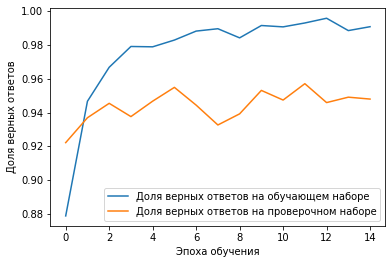

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_10000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_10000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

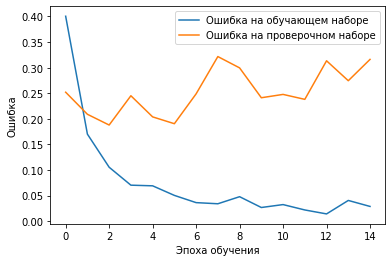

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_10000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_10000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Обучающая выборка 500 примеров




Аналогичным образом проверим какие показали будут у нейронной сети при обучающей выборке в 500 примеров.
 Размер **batch_size** сделаем еще меньше, так как обучающая выборка стала меньше в **100** раз меньше чем в первом примере.

In [ ]:
n_val = 59500              # Проверочная выборка            
x_len = x_train.shape[0] 

model_500 = createModel()

history_500= model_500.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=2,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
250/250 [==============================] - 42s 169ms/step - loss: 1.4658 - accuracy: 0.5130 - val_loss: 0.8109 - val_accuracy: 0.7392
Epoch 2/15
250/250 [==============================] - 42s 170ms/step - loss: 0.3346 - accuracy: 0.8963 - val_loss: 0.6736 - val_accuracy: 0.8104
Epoch 3/15
250/250 [==============================] - 42s 167ms/step - loss: 0.1819 - accuracy: 0.9299 - val_loss: 0.7868 - val_accuracy: 0.8088
Epoch 4/15
250/250 [==============================] - 42s 170ms/step - loss: 0.0594 - accuracy: 0.9868 - val_loss: 0.7569 - val_accuracy: 0.8109
Epoch 5/15
250/250 [==============================] - 42s 168ms/step - loss: 0.0541 - accuracy: 0.9797 - val_loss: 0.7313 - val_accuracy: 0.8436
Epoch 6/15
250/250 [==============================] - 42s 167ms/step - loss: 0.0106 - accuracy: 0.9994 - val_loss: 0.7956 - val_accuracy: 0.8399
Epoch 7/15
250/250 [==============================] - 42s 168ms/step - loss: 0.0778 - accuracy: 0.9801 - val_loss: 1.0164 - val_ac

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_500 = model_500.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_500[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.8083 - accuracy: 0.8613
Доля верных ответов на тестовых данных, в процентах: 86.13%


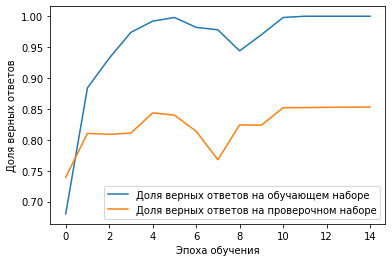

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_500.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_500.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

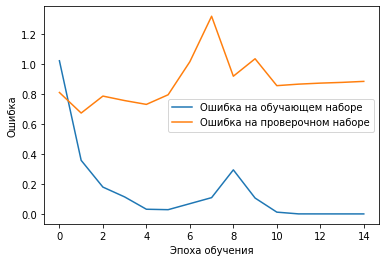

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_500.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_500.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Результаты

Создадим таблицу для наглядности. Сделаем ее универсальной. Возьмем ранее сохраненные значения из соответствующих переменных. Теперь можно перезапускать нейронные сети с разными параметрами и смотреть на данные в таблице просто запустив код

In [ ]:
index = ['50000','10000','500']
columns= ['Ошибка на обучающем наборе','Доля верных ответов на обучающем наборе',
          'Ошибка на проверочном наборе','Доля верных ответов на проверочном наборе', 
          'Ошибка на тестовом наборе', 'Доля верных ответов на тестовом наборе']

data = [[history_50000.history['loss'][-1], history_50000.history['accuracy'][-1], history_50000.history['val_loss'][-1], history_50000.history['val_accuracy'][-1], 
         scores_50000[0],scores_50000[1]],
        [history_10000.history['loss'][-1], history_10000.history['accuracy'][-1], history_10000.history['val_loss'][-1], history_10000.history['val_accuracy'][-1],
         scores_10000[0],scores_10000[1]],
        [history_500.history['loss'][-1],   history_500.history['accuracy'][-1],   history_500.history['val_loss'][-1],   history_500.history['val_accuracy'][-1], 
         scores_500[0],scores_500[1]]]
result = pd.DataFrame(data=data, columns = columns, index = index)
result

,Ошибка на обучающем наборе,Доля верных ответов на обучающем наборе,Ошибка на проверочном наборе,Доля верных ответов на проверочном наборе,Ошибка на тестовом наборе,Доля верных ответов на тестовом наборе
50000,0.013283,0.99572,0.133117,0.975300,0.121570,0.9777
10000,0.028854,0.99080,0.316172,0.948000,0.295738,0.9489
500,0.000148,1.00000,0.884988,0.852992,0.808269,0.8613


# Выводы только по Заданию 1

Общие:

  - С помощью проверчной выборки можно смотреть на реальные значения нейронной сети. Так как на проверочных данных она не обучалась, поэтому по этим значениям можно судить о работе нашей сети. 


  - Так же с помощью значений полученных из проверочной выборки можно построить график и проанализировать его. 

  При обучающей выборке = **50000** начиная с **6** эпохи начала возрастать ошибка.

  При обучающей выборке = **10000** начиная с **3** эпохи начала возрастать ошибка.

  При обучающей выборке = **500** начиная с **1** эпохи начала возрастать ошибка, но очень медленно.

  Видно что присутствует переобучение у всех моделей сети.


  - Чем больше мы веделяем примеров для проверочной выборки, тем меньше остается для обучающей. Что в следствии сказывается на обучаемость сети. Доля верных ответов на проверочном и тестовой наборах падают, а доля ошибок растут.

  - Доля верных ответов на обучающем наборе остается без изменений и  стремиться к 100%, что свидетельствует о переобучении сети.

  - В соответствии с имеющейся базой для обучения нужно самим подбирать процент обучающихся, проверочных и тестовых выборок для достижения наилучшего результата. 

  На длительность обучения влияет не только размер обучающей выборки, но и проверочной. 
  - Так при обучающей выборки - 500  и проверочной - 59500, сеть очень долго обучалась, так как долго обрабатывала проверочную выборку.

  -Самый худший результат при обучающей выборке =500, так как очень мало примеров для обучения нейронной сети
    

# Задание 2. Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке. Сделайте сравнительную таблицу.

Попробуем изменить гиперпараметры (число нейронов, слоев, активационные функции и т.д.)

  Для сравнения результатов параметры **batch_size** и кол-во **эпох** будут такие же как и в первом задании.

Для двух вариантов сети будет тот же набор обучающей и проверочной выборки:

  -Обучающая выборка 50.000 примеров

  -Обучающая выборка 10.000 примеров

  -Обучающая выборка 500 примеров

In [ ]:
# Создадим вторую функцию, которая будет возвращать пустую сеть. Чтобы далее было меньше одинакого кода.
def createModel_2():

  # Создаем каркас
  model_2 = Sequential()

  # Добавляем слои
  model_2.add(Dense(10, input_dim = 784, activation = "relu"))
  model_2.add(Dense(500, activation = "relu"))
  model_2.add(Dense(10,activation = "softmax"))

  # Компилируем сеть
  model_2.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

  return model_2 # Возвращаем созданную сеть

# Вариант 2. Обучающая выборка 50.000 примеров

In [ ]:
n_val = 10000              # Проверочная выборка            
x_len = x_train.shape[0] 

model_2_50000 = createModel_2()    # Вызываем функцию со второй моделью сети

history_2_50000 = model_2_50000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=128,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
391/391 [==============================] - 2s 3ms/step - loss: 0.9951 - accuracy: 0.6880 - val_loss: 0.2752 - val_accuracy: 0.9220
Epoch 2/15
391/391 [==============================] - 1s 3ms/step - loss: 0.2801 - accuracy: 0.9166 - val_loss: 0.2182 - val_accuracy: 0.9346
Epoch 3/15
391/391 [==============================] - 1s 3ms/step - loss: 0.2260 - accuracy: 0.9342 - val_loss: 0.1919 - val_accuracy: 0.9435
Epoch 4/15
391/391 [==============================] - 1s 3ms/step - loss: 0.1889 - accuracy: 0.9455 - val_loss: 0.1840 - val_accuracy: 0.9455
Epoch 5/15
391/391 [==============================] - 1s 3ms/step - loss: 0.1695 - accuracy: 0.9499 - val_loss: 0.1601 - val_accuracy: 0.9526
Epoch 6/15
391/391 [==============================] - 1s 3ms/step - loss: 0.1571 - accuracy: 0.9515 - val_loss: 0.1635 - val_accuracy: 0.9534
Epoch 7/15
391/391 [==============================] - 1s 3ms/step - loss: 0.1484 - accuracy: 0.9561 - val_loss: 0.1570 - val_accuracy: 0.9533
Epoch 

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_2_50000 = model_2_50000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_2_50000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9558
Доля верных ответов на тестовых данных, в процентах: 95.58%


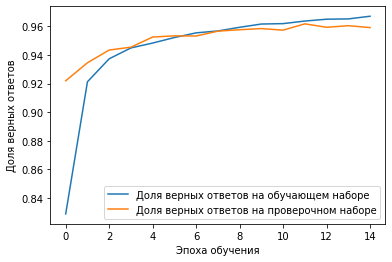

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_2_50000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_2_50000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

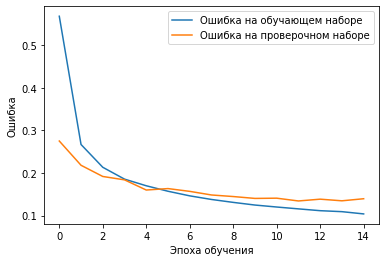

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_2_50000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_2_50000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Вариант 2. Обучающая выборка 10.000 примеров

In [ ]:
n_val = 50000              # Проверочная выборка            
x_len = x_train.shape[0] 

model_2_10000 = createModel_2()    # Вызываем функцию со второй моделью сети

history_2_10000 = model_2_10000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=30,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
334/334 [==============================] - 4s 12ms/step - loss: 1.1982 - accuracy: 0.6142 - val_loss: 0.4046 - val_accuracy: 0.8771
Epoch 2/15
334/334 [==============================] - 4s 11ms/step - loss: 0.3191 - accuracy: 0.9085 - val_loss: 0.3230 - val_accuracy: 0.9051
Epoch 3/15
334/334 [==============================] - 4s 11ms/step - loss: 0.2618 - accuracy: 0.9242 - val_loss: 0.3110 - val_accuracy: 0.9100
Epoch 4/15
334/334 [==============================] - 4s 11ms/step - loss: 0.2298 - accuracy: 0.9342 - val_loss: 0.3141 - val_accuracy: 0.9096
Epoch 5/15
334/334 [==============================] - 4s 11ms/step - loss: 0.1934 - accuracy: 0.9443 - val_loss: 0.2850 - val_accuracy: 0.9160
Epoch 6/15
334/334 [==============================] - 4s 11ms/step - loss: 0.1980 - accuracy: 0.9430 - val_loss: 0.2886 - val_accuracy: 0.9160
Epoch 7/15
334/334 [==============================] - 4s 11ms/step - loss: 0.1684 - accuracy: 0.9511 - val_loss: 0.2733 - val_accuracy: 0.9205

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_2_10000  = model_2_10000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_2_10000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.2933 - accuracy: 0.9233
Доля верных ответов на тестовых данных, в процентах: 92.33%


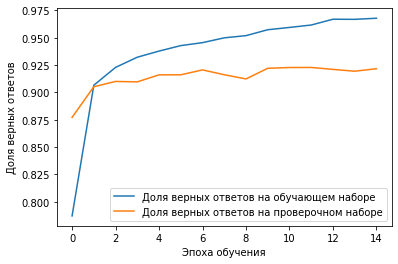

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_2_10000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_2_10000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

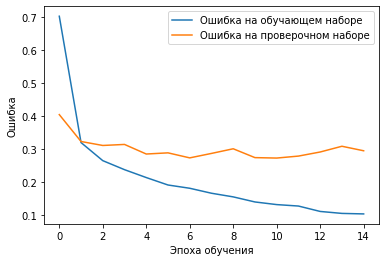

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_2_10000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_2_10000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Вариант 2. Обучающая выборка 500 примеров

In [ ]:
n_val = 59500              # Проверочная выборка            
x_len = x_train.shape[0] 

model_2_500 = createModel_2()    # Вызываем функцию со второй моделью сети

history_2_500 = model_2_500.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=2,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
250/250 [==============================] - 43s 171ms/step - loss: 2.0050 - accuracy: 0.2891 - val_loss: 1.0819 - val_accuracy: 0.6352
Epoch 2/15
250/250 [==============================] - 43s 171ms/step - loss: 0.6604 - accuracy: 0.7815 - val_loss: 0.7612 - val_accuracy: 0.7536
Epoch 3/15
250/250 [==============================] - 43s 172ms/step - loss: 0.3685 - accuracy: 0.8576 - val_loss: 0.7061 - val_accuracy: 0.7832
Epoch 4/15
250/250 [==============================] - 43s 173ms/step - loss: 0.2311 - accuracy: 0.9288 - val_loss: 0.7241 - val_accuracy: 0.7954
Epoch 5/15
250/250 [==============================] - 42s 168ms/step - loss: 0.1137 - accuracy: 0.9682 - val_loss: 0.8712 - val_accuracy: 0.7668
Epoch 6/15
250/250 [==============================] - 41s 165ms/step - loss: 0.0890 - accuracy: 0.9812 - val_loss: 0.7637 - val_accuracy: 0.8039
Epoch 7/15
250/250 [==============================] - 42s 168ms/step - loss: 0.0537 - accuracy: 0.9899 - val_loss: 0.9414 - val_ac

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_2_500 = model_2_500.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_2_500[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 1.0200 - accuracy: 0.8155
Доля верных ответов на тестовых данных, в процентах: 81.55%


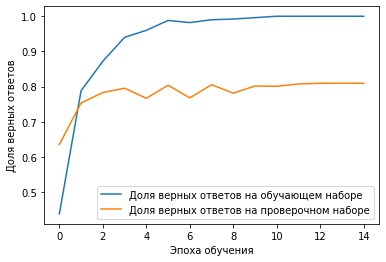

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_2_500.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_2_500.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

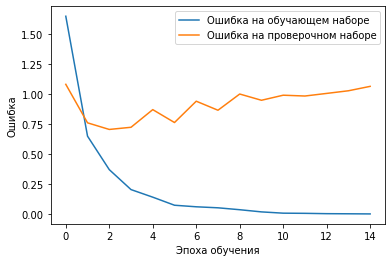

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_2_500.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_2_500.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Результаты

In [ ]:
index_2 = ['50000','10000','500','Вариант 2 - 50000','Вариант 2 - 10000','Вариант 2 - 500']
columns_2= ['Ошибка на обучающем наборе',  'Доля верных ответов на обучающем наборе',
            'Ошибка на проверочном наборе','Доля верных ответов на проверочном наборе',
            'Ошибка на тестовом наборе',   'Доля верных ответов на тестовом наборе']

data_2 = [[history_50000.history['loss'][-1], history_50000.history['accuracy'][-1], history_50000.history['val_loss'][-1], history_50000.history['val_accuracy'][-1], 
         scores_50000[0],scores_50000[1]],
        [history_10000.history['loss'][-1], history_10000.history['accuracy'][-1], history_10000.history['val_loss'][-1], history_10000.history['val_accuracy'][-1], 
         scores_10000[0],scores_10000[1]],
        [history_500.history['loss'][-1], history_500.history['accuracy'][-1], history_500.history['val_loss'][-1], history_500.history['val_accuracy'][-1], 
         scores_500[0],scores_500[1]],
        [history_2_50000.history['loss'][-1], history_2_50000.history['accuracy'][-1], history_2_50000.history['val_loss'][-1], history_2_50000.history['val_accuracy'][-1], 
         scores_2_50000[0],scores_2_50000[1]],
        [history_2_10000.history['loss'][-1], history_2_10000.history['accuracy'][-1], history_2_10000.history['val_loss'][-1], history_2_10000.history['val_accuracy'][-1], 
         scores_2_10000[0],scores_2_10000[1]],
        [history_2_500.history['loss'][-1], history_2_500.history['accuracy'][-1], history_2_500.history['val_loss'][-1], history_2_500.history['val_accuracy'][-1], 
         scores_2_500[0],scores_2_500[1]]]


result_2 = pd.DataFrame(data=data_2, columns = columns_2, index = index_2)
result_2

,Ошибка на обучающем наборе,Доля верных ответов на обучающем наборе,Ошибка на проверочном наборе,Доля верных ответов на проверочном наборе,Ошибка на тестовом наборе,Доля верных ответов на тестовом наборе
50000,0.013283,0.99572,0.133117,0.975300,0.121570,0.9777
10000,0.028854,0.99080,0.316172,0.948000,0.295738,0.9489
500,0.000148,1.00000,0.884988,0.852992,0.808269,0.8613
Вариант 2 - 50000,0.104033,0.96712,0.139673,0.959200,0.142423,0.9558
Вариант 2 - 10000,0.103230,0.96770,0.294882,0.921580,0.293350,0.9233
Вариант 2 - 500,0.002528,1.00000,1.065012,0.809345,1.019978,0.8155


# Задание 2. Продолжение. Создание 3 варианта сети

Попробуем изменить гиперпараметры (число нейронов, слоев, активационные функции и т.д.)

  Для сравнения результатов параметры **batch_size** и кол-во **эпох** будут такие же как и в первом задании и в предыдущей сети 

  -Обучающая выборка 50.000 примеров

  -Обучающая выборка 10.000 примеров

  -Обучающая выборка 500 примеров

In [ ]:
# Создадим третью функцию, которая будет возвращать пустую сеть. Чтобы далее было меньше одинакого кода.
def createModel_3():

  # Создаем каркас
  model_3 = Sequential()

  # Добавляем слои
  model_3.add(Dense(1000, input_dim = 784, activation = "relu"))
  model_3.add(Dense(1000, activation = "relu"))
  model_3.add(Dense(10,activation = "softmax"))

  # Компилируем сеть
  model_3.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

  return model_3 # Возвращаем созданную сеть

# Вариант 3. Обучающая выборка 50.000 примеров

In [ ]:
n_val = 10000              # Проверочная выборка            
x_len = x_train.shape[0] 

model_3_50000 = createModel_3()    # Вызываем функцию со второй моделью сети

history_3_50000 = model_3_50000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=128,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
391/391 [==============================] - 2s 4ms/step - loss: 0.3796 - accuracy: 0.8861 - val_loss: 0.0902 - val_accuracy: 0.9720
Epoch 2/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0766 - accuracy: 0.9763 - val_loss: 0.0939 - val_accuracy: 0.9728
Epoch 3/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.0959 - val_accuracy: 0.9706
Epoch 4/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 5/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.1145 - val_accuracy: 0.9706
Epoch 6/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0978 - val_accuracy: 0.9765
Epoch 7/15
391/391 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.0890 - val_accuracy: 0.9789
Epoch 

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_3_50000 = model_3_50000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_3_50000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9805
Доля верных ответов на тестовых данных, в процентах: 98.05%


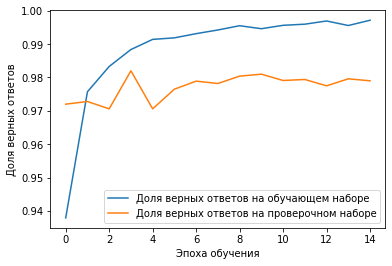

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_3_50000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_3_50000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

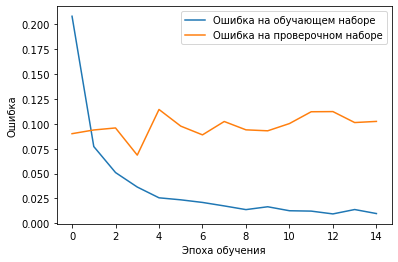

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_3_50000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_3_50000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Вариант 3. Обучающая выборка 10.000 примеров

In [ ]:
n_val = 50000              # Проверочная выборка            
x_len = x_train.shape[0] 

model_3_10000 = createModel_3()    # Вызываем функцию со второй моделью сети

history_3_10000 = model_3_10000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=30,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
334/334 [==============================] - 4s 12ms/step - loss: 0.5845 - accuracy: 0.8152 - val_loss: 0.2682 - val_accuracy: 0.9181
Epoch 2/15
334/334 [==============================] - 4s 12ms/step - loss: 0.1355 - accuracy: 0.9583 - val_loss: 0.1845 - val_accuracy: 0.9446
Epoch 3/15
334/334 [==============================] - 4s 12ms/step - loss: 0.0683 - accuracy: 0.9787 - val_loss: 0.1732 - val_accuracy: 0.9527
Epoch 4/15
334/334 [==============================] - 4s 12ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 0.2130 - val_accuracy: 0.9425
Epoch 5/15
334/334 [==============================] - 4s 11ms/step - loss: 0.0363 - accuracy: 0.9898 - val_loss: 0.2692 - val_accuracy: 0.9412
Epoch 6/15
334/334 [==============================] - 4s 12ms/step - loss: 0.0415 - accuracy: 0.9886 - val_loss: 0.2422 - val_accuracy: 0.9435
Epoch 7/15
334/334 [==============================] - 4s 12ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.1948 - val_accuracy: 0.9554

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_3_10000  = model_3_10000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_3_10000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.1808 - accuracy: 0.9659
Доля верных ответов на тестовых данных, в процентах: 96.59%


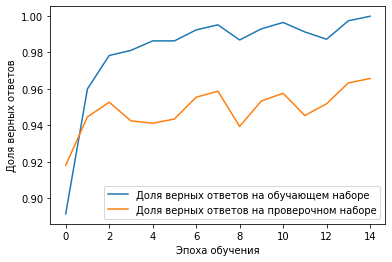

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_3_10000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_3_10000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

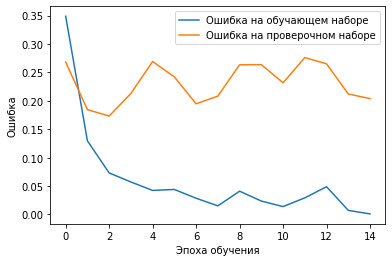

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_3_10000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_3_10000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Вариант 3. Обучающая выборка 500 примеров

In [ ]:
n_val = 59500              # Проверочная выборка            
x_len = x_train.shape[0] 

model_3_500 = createModel_3()    # Вызываем функцию со второй моделью сети

history_3_500 = model_3_500.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=2,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
250/250 [==============================] - 44s 175ms/step - loss: 1.2768 - accuracy: 0.5736 - val_loss: 0.9248 - val_accuracy: 0.7193
Epoch 2/15
250/250 [==============================] - 43s 174ms/step - loss: 0.2332 - accuracy: 0.9288 - val_loss: 0.7217 - val_accuracy: 0.8065
Epoch 3/15
250/250 [==============================] - 43s 172ms/step - loss: 0.2389 - accuracy: 0.9202 - val_loss: 1.3201 - val_accuracy: 0.7041
Epoch 4/15
250/250 [==============================] - 43s 174ms/step - loss: 0.1977 - accuracy: 0.9451 - val_loss: 1.0092 - val_accuracy: 0.7785
Epoch 5/15
250/250 [==============================] - 43s 172ms/step - loss: 0.0864 - accuracy: 0.9799 - val_loss: 1.0627 - val_accuracy: 0.8116
Epoch 6/15
250/250 [==============================] - 44s 176ms/step - loss: 0.3015 - accuracy: 0.9383 - val_loss: 1.0420 - val_accuracy: 0.7896
Epoch 7/15
250/250 [==============================] - 43s 172ms/step - loss: 0.0718 - accuracy: 0.9754 - val_loss: 0.8892 - val_ac

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_3_500 = model_3_500.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_3_500[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.8943 - accuracy: 0.8661
Доля верных ответов на тестовых данных, в процентах: 86.61%


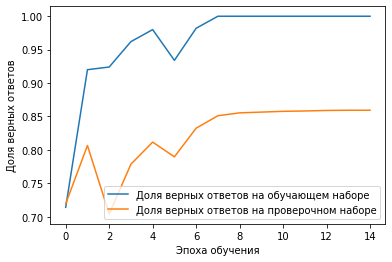

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_3_500.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_3_500.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

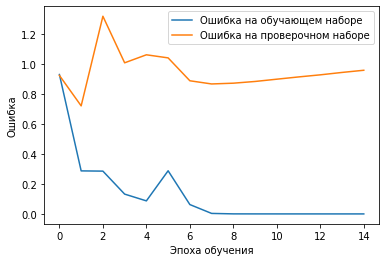

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_3_500.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_3_500.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Результаты

In [ ]:
index_3 = ['50000','10000','500','Вариант 2 - 50000','Вариант 2 - 10000','Вариант 2 - 500','Вариант 3 - 50000','Вариант 3 - 10000','Вариант 3 - 500']
columns_3= ['Ошибка на обучающем наборе',  'Доля верных ответов на обучающем наборе',
            'Ошибка на проверочном наборе','Доля верных ответов на проверочном наборе',
            'Ошибка на тестовом наборе',   'Доля верных ответов на тестовом наборе']

data_3 = [[history_50000.history['loss'][-1], history_50000.history['accuracy'][-1], history_50000.history['val_loss'][-1], history_50000.history['val_accuracy'][-1], 
         scores_50000[0],scores_50000[1]],
        [history_10000.history['loss'][-1], history_10000.history['accuracy'][-1], history_10000.history['val_loss'][-1], history_10000.history['val_accuracy'][-1], 
         scores_10000[0],scores_10000[1]],
        [history_500.history['loss'][-1], history_500.history['accuracy'][-1], history_500.history['val_loss'][-1], history_500.history['val_accuracy'][-1], 
         scores_500[0],scores_500[1]],
        [history_2_50000.history['loss'][-1], history_2_50000.history['accuracy'][-1], history_2_50000.history['val_loss'][-1], history_2_50000.history['val_accuracy'][-1], 
         scores_2_50000[0],scores_2_50000[1]],
        [history_2_10000.history['loss'][-1], history_2_10000.history['accuracy'][-1], history_2_10000.history['val_loss'][-1], history_2_10000.history['val_accuracy'][-1], 
         scores_2_10000[0],scores_2_10000[1]],
        [history_2_500.history['loss'][-1], history_2_500.history['accuracy'][-1], history_2_500.history['val_loss'][-1], history_2_500.history['val_accuracy'][-1], 
         scores_2_500[0],scores_2_500[1]],
        [history_3_50000.history['loss'][-1], history_3_50000.history['accuracy'][-1], history_3_50000.history['val_loss'][-1], history_3_50000.history['val_accuracy'][-1], 
         scores_3_50000[0],scores_3_50000[1]],
        [history_3_10000.history['loss'][-1], history_3_10000.history['accuracy'][-1], history_3_10000.history['val_loss'][-1], history_3_10000.history['val_accuracy'][-1], 
         scores_3_10000[0],scores_3_10000[1]],
        [history_3_500.history['loss'][-1], history_3_500.history['accuracy'][-1], history_3_500.history['val_loss'][-1], history_3_500.history['val_accuracy'][-1], 
         scores_3_500[0],scores_3_500[1]]]


result_3 = pd.DataFrame(data=data_3, columns = columns_3, index = index_3)
result_3

,Ошибка на обучающем наборе,Доля верных ответов на обучающем наборе,Ошибка на проверочном наборе,Доля верных ответов на проверочном наборе,Ошибка на тестовом наборе,Доля верных ответов на тестовом наборе
50000,0.013283,0.99572,0.133117,0.975300,0.121570,0.9777
10000,0.028854,0.99080,0.316172,0.948000,0.295738,0.9489
500,0.000148,1.00000,0.884988,0.852992,0.808269,0.8613
Вариант 2 - 50000,0.104033,0.96712,0.139673,0.959200,0.142423,0.9558
Вариант 2 - 10000,0.103230,0.96770,0.294882,0.921580,0.293350,0.9233
Вариант 2 - 500,0.002528,1.00000,1.065012,0.809345,1.019978,0.8155
Вариант 3 - 50000,0.009803,0.99716,0.102498,0.979000,0.096842,0.9805
Вариант 3 - 10000,0.001015,0.99980,0.203974,0.965700,0.180821,0.9659
Вариант 3 - 500,0.000018,1.00000,0.959399,0.859311,0.894318,0.8661


# Выводы по Заданию 2

Общие:

  - Изменение числа нейронов влияет на результат показаний значений нейронной сети.

  - На графиках ошибок видно, что не смотря на конфигурацию сети, чем меньше примеров в обучающей выборке, тем больше значение ошибки.

  - На примерах сети с обучающей выборке 10000 и 500 присутствует переобучение сети после нескольких эпох

  - Чем больше мы веделяем примеров для проверочной выборки, тем меньше остается для обучающей. Что в следствии сказывается на обучаемость сети. Доля верных ответов на проверочном и тестовой наборах падают, а доля ошибок растут.

  - Доля верных ответов на обучающем наборе остается без изменений и  стремиться к 100% , что свидетельствует о переобучении сети.

  -Самый худший результат при обучающей выборке =500, так как очень мало примеров для обучения нейронной сети
    

# Задание 3
Создайте сеть следующей архитектуры:

4 Dense слоя

Dropout слоя

BatchNormalization слоя

Напишите свои выводы по результатам проведенных тестов.

Не смотря на то что лучший результат показала сеть Варианта **3** с обучающей выборкой в **50000** примеров. Задание **3** будем проделывать на **первом** варианте сети, с обучающей выборкой в **10000** примеров. Так как там присутствует переобучение сети. 
   Попробуем это исправить используя слои Dropout и BatchNormalization слоев.

Изначальный график, без Dropout  BatchNormalization слоев.

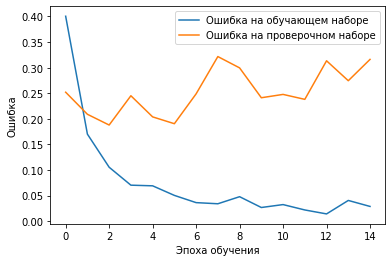

In [ ]:
# 1 Вариант сети
plt.plot(history_10000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_10000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# С использованием Dropout, c обучающей выборкой 10000

In [ ]:
# Создаем каркас
model_drop_10000 = Sequential()

# Добавляем слои
model_drop_10000.add(Dropout(0.3, input_shape=(784,)))
model_drop_10000.add(Dense(100, activation = "relu"))
model_drop_10000.add(Dropout(0.3))
model_drop_10000.add(Dense(5000, activation = "relu"))
model_drop_10000.add(Dropout(0.3))
model_drop_10000.add(Dense(10,activation = "softmax"))

# Компилируем сеть
model_drop_10000.compile(loss="categorical_crossentropy" , optimizer=Adam(lr=0.001), metrics = ["accuracy"])

In [ ]:
n_val = 50000              # Проверочная выборка            
x_len = x_train.shape[0] 


history_drop_10000 = model_drop_10000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=30,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
334/334 [==============================] - 4s 12ms/step - loss: 1.0121 - accuracy: 0.6650 - val_loss: 0.2958 - val_accuracy: 0.9099
Epoch 2/15
334/334 [==============================] - 4s 12ms/step - loss: 0.3744 - accuracy: 0.8768 - val_loss: 0.2355 - val_accuracy: 0.9287
Epoch 3/15
334/334 [==============================] - 4s 12ms/step - loss: 0.3124 - accuracy: 0.9049 - val_loss: 0.2114 - val_accuracy: 0.9360
Epoch 4/15
334/334 [==============================] - 4s 12ms/step - loss: 0.3029 - accuracy: 0.9087 - val_loss: 0.2079 - val_accuracy: 0.9375
Epoch 5/15
334/334 [==============================] - 4s 11ms/step - loss: 0.2471 - accuracy: 0.9212 - val_loss: 0.1982 - val_accuracy: 0.9397
Epoch 6/15
334/334 [==============================] - 4s 12ms/step - loss: 0.2402 - accuracy: 0.9265 - val_loss: 0.1705 - val_accuracy: 0.9487
Epoch 7/15
334/334 [==============================] - 4s 12ms/step - loss: 0.2112 - accuracy: 0.9302 - val_loss: 0.1714 - val_accuracy: 0.9495

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_drop_10000 = model_drop_10000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_drop_10000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.1647 - accuracy: 0.9562
Доля верных ответов на тестовых данных, в процентах: 95.62%


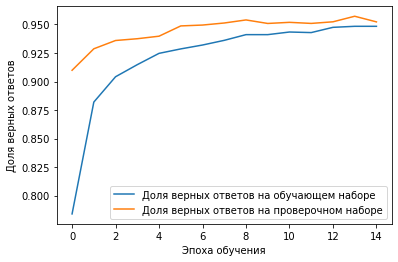

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_drop_10000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_drop_10000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

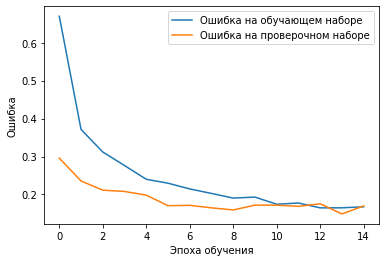

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_drop_10000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_drop_10000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# С использованием BatchNormalization слоев, c обучающей выборкой 10000

In [ ]:
# Создаем каркас
model_batch_10000 = Sequential()

# Добавляем слои
model_batch_10000.add(BatchNormalization(input_shape=(784, )))
model_batch_10000.add(Dense(100, activation = "relu"))
model_batch_10000.add(BatchNormalization())
model_batch_10000.add(Dense(5000, activation = "relu"))
model_batch_10000.add(Dense(10,activation = "softmax"))

# Компилируем сеть
model_batch_10000.compile(loss="categorical_crossentropy" , optimizer=Adam(lr=0.001), metrics = ["accuracy"])

In [ ]:
n_val = 50000              # Проверочная выборка            
x_len = x_train.shape[0] 


history_batch_10000 = model_batch_10000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=30,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
334/334 [==============================] - 5s 13ms/step - loss: 0.6013 - accuracy: 0.8116 - val_loss: 0.2548 - val_accuracy: 0.9244
Epoch 2/15
334/334 [==============================] - 4s 13ms/step - loss: 0.2005 - accuracy: 0.9357 - val_loss: 0.3163 - val_accuracy: 0.9203
Epoch 3/15
334/334 [==============================] - 4s 13ms/step - loss: 0.1446 - accuracy: 0.9572 - val_loss: 0.2869 - val_accuracy: 0.9273
Epoch 4/15
334/334 [==============================] - 4s 13ms/step - loss: 0.1163 - accuracy: 0.9629 - val_loss: 0.2816 - val_accuracy: 0.9356
Epoch 5/15
334/334 [==============================] - 4s 13ms/step - loss: 0.0964 - accuracy: 0.9689 - val_loss: 0.3063 - val_accuracy: 0.9357
Epoch 6/15
334/334 [==============================] - 4s 13ms/step - loss: 0.0772 - accuracy: 0.9763 - val_loss: 0.3184 - val_accuracy: 0.9345
Epoch 7/15
334/334 [==============================] - 4s 13ms/step - loss: 0.0941 - accuracy: 0.9689 - val_loss: 0.3605 - val_accuracy: 0.9371

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_batch_10000 = model_batch_10000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_batch_10000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.9508
Доля верных ответов на тестовых данных, в процентах: 95.08%


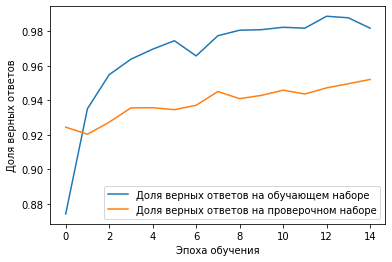

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_batch_10000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_batch_10000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

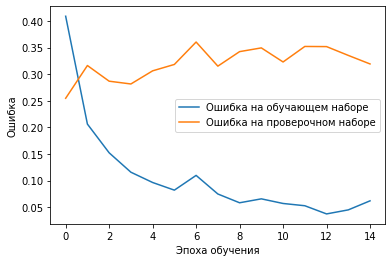

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_batch_10000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_batch_10000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# С использованием Dropout и BatchNormalization слоев, c обучающей выборкой 10000




In [ ]:
# Создаем каркас
model_drop_and_batch_10000 = Sequential()

# Добавляем слои
model_drop_and_batch_10000.add(Dense(100, input_dim = 784, activation = "relu"))
model_drop_and_batch_10000.add(BatchNormalization())
model_drop_and_batch_10000.add(Dropout(0.3))
model_drop_and_batch_10000.add(Dense(5000, activation = "relu"))
model_drop_and_batch_10000.add(BatchNormalization())
model_drop_and_batch_10000.add(Dropout(0.3))
model_drop_and_batch_10000.add(Dense(10,activation = "softmax"))

# Компилируем сеть
model_drop_and_batch_10000.compile(loss="categorical_crossentropy" , optimizer=Adam(lr=0.001), metrics = ["accuracy"])

In [ ]:
n_val = 50000              # Проверочная выборка            
x_len = x_train.shape[0] 


history_drop_and_batch_10000 = model_drop_and_batch_10000.fit(x_train[:x_len - n_val], y_train[:x_len - n_val],        
                               batch_size=30,  epochs=15,
                               validation_data=(x_train[x_len - n_val:], y_train[x_len - n_val:]), verbose=1)

Epoch 1/15
334/334 [==============================] - 5s 13ms/step - loss: 1.4241 - accuracy: 0.7230 - val_loss: 0.4576 - val_accuracy: 0.8822
Epoch 2/15
334/334 [==============================] - 5s 14ms/step - loss: 0.6393 - accuracy: 0.8716 - val_loss: 0.3688 - val_accuracy: 0.9192
Epoch 3/15
334/334 [==============================] - 4s 13ms/step - loss: 0.4663 - accuracy: 0.8949 - val_loss: 0.3752 - val_accuracy: 0.9246
Epoch 4/15
334/334 [==============================] - 4s 13ms/step - loss: 0.4375 - accuracy: 0.9065 - val_loss: 0.3319 - val_accuracy: 0.9309
Epoch 5/15
334/334 [==============================] - 4s 13ms/step - loss: 0.3861 - accuracy: 0.9056 - val_loss: 0.4316 - val_accuracy: 0.9245
Epoch 6/15
334/334 [==============================] - 5s 14ms/step - loss: 0.3820 - accuracy: 0.9147 - val_loss: 0.3471 - val_accuracy: 0.9370
Epoch 7/15
334/334 [==============================] - 5s 14ms/step - loss: 0.3047 - accuracy: 0.9313 - val_loss: 0.3368 - val_accuracy: 0.9365

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_drop_and_batch_10000 = model_drop_and_batch_10000.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_drop_and_batch_10000[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.2949 - accuracy: 0.9514
Доля верных ответов на тестовых данных, в процентах: 95.14%


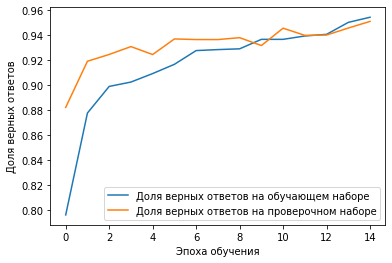

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_drop_and_batch_10000.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_drop_and_batch_10000.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

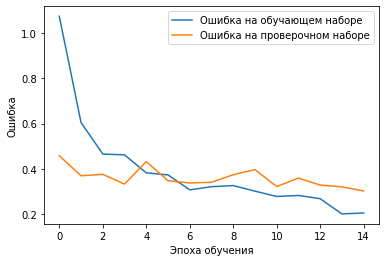

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_drop_and_batch_10000.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_drop_and_batch_10000.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Результаты общие

In [ ]:
index_all = ['50000','10000','500',
             'Вариант 2 - 50000','Вариант 2 - 10000','Вариант 2 - 500',
             'Вариант 3 - 50000','Вариант 3 - 10000','Вариант 3 - 500',
             'Dropout - 1000','BatchNormalization - 10000', 'Dropout и BatchNormalization - 10000']
columns_all= ['Ошибка на обучающем наборе',  'Доля верных ответов на обучающем наборе',
            'Ошибка на проверочном наборе','Доля верных ответов на проверочном наборе',
            'Ошибка на тестовом наборе',   'Доля верных ответов на тестовом наборе']

data_all = [[history_50000.history['loss'][-1], history_50000.history['accuracy'][-1], history_50000.history['val_loss'][-1], history_50000.history['val_accuracy'][-1], 
         scores_50000[0],scores_50000[1]],
        [history_10000.history['loss'][-1], history_10000.history['accuracy'][-1], history_10000.history['val_loss'][-1], history_10000.history['val_accuracy'][-1], 
         scores_10000[0],scores_10000[1]],
        [history_500.history['loss'][-1], history_500.history['accuracy'][-1], history_500.history['val_loss'][-1], history_500.history['val_accuracy'][-1], 
         scores_500[0],scores_500[1]],
        [history_2_50000.history['loss'][-1], history_2_50000.history['accuracy'][-1], history_2_50000.history['val_loss'][-1], history_2_50000.history['val_accuracy'][-1], 
         scores_2_50000[0],scores_2_50000[1]],
        [history_2_10000.history['loss'][-1], history_2_10000.history['accuracy'][-1], history_2_10000.history['val_loss'][-1], history_2_10000.history['val_accuracy'][-1], 
         scores_2_10000[0],scores_2_10000[1]],
        [history_2_500.history['loss'][-1], history_2_500.history['accuracy'][-1], history_2_500.history['val_loss'][-1], history_2_500.history['val_accuracy'][-1], 
         scores_2_500[0],scores_2_500[1]],
        [history_3_50000.history['loss'][-1], history_3_50000.history['accuracy'][-1], history_3_50000.history['val_loss'][-1], history_3_50000.history['val_accuracy'][-1], 
         scores_3_50000[0],scores_3_50000[1]],
        [history_3_10000.history['loss'][-1], history_3_10000.history['accuracy'][-1], history_3_10000.history['val_loss'][-1], history_3_10000.history['val_accuracy'][-1], 
         scores_3_10000[0],scores_3_10000[1]],
        [history_3_500.history['loss'][-1], history_3_500.history['accuracy'][-1], history_3_500.history['val_loss'][-1], history_3_500.history['val_accuracy'][-1], 
         scores_3_500[0],scores_3_500[1]],
         [history_drop_10000.history['loss'][-1], history_drop_10000.history['accuracy'][-1], history_drop_10000.history['val_loss'][-1], history_drop_10000.history['val_accuracy'][-1], 
         scores_drop_10000[0],scores_drop_10000[1]],
        [history_batch_10000.history['loss'][-1], history_batch_10000.history['accuracy'][-1], history_batch_10000.history['val_loss'][-1], history_batch_10000.history['val_accuracy'][-1], 
         scores_batch_10000[0],scores_batch_10000[1]],
        [history_drop_and_batch_10000.history['loss'][-1], history_drop_and_batch_10000.history['accuracy'][-1], history_drop_and_batch_10000.history['val_loss'][-1], history_drop_and_batch_10000.history['val_accuracy'][-1], 
         scores_drop_and_batch_10000[0],scores_drop_and_batch_10000[1]]]


result_all = pd.DataFrame(data=data_all, columns = columns_all, index = index_all)
result_all

,Ошибка на обучающем наборе,Доля верных ответов на обучающем наборе,Ошибка на проверочном наборе,Доля верных ответов на проверочном наборе,Ошибка на тестовом наборе,Доля верных ответов на тестовом наборе
50000,0.013283,0.99572,0.133117,0.975300,0.121570,0.9777
10000,0.028854,0.99080,0.316172,0.948000,0.295738,0.9489
500,0.000148,1.00000,0.884988,0.852992,0.808269,0.8613
Вариант 2 - 50000,0.104033,0.96712,0.139673,0.959200,0.142423,0.9558
Вариант 2 - 10000,0.103230,0.96770,0.294882,0.921580,0.293350,0.9233
Вариант 2 - 500,0.002528,1.00000,1.065012,0.809345,1.019978,0.8155
Вариант 3 - 50000,0.009803,0.99716,0.102498,0.979000,0.096842,0.9805
Вариант 3 - 10000,0.001015,0.99980,0.203974,0.965700,0.180821,0.9659
Вариант 3 - 500,0.000018,1.00000,0.959399,0.859311,0.894318,0.8661
Dropout - 1000,0.167528,0.94840,0.169791,0.952280,0.164678,0.9562


# Выводы по Заданию 3

 - Лучший результат по заданию 3 показала сеть с использованием только Dropout слоев. 
  - Незначительное улучшение ситуации с переобучением сети 

# Общие выводы

- Как было сказано на лекции 80% успеха это хорошо собранная база.
- Если рассматривать в целом то из-за хорошо собранной базы, которую разделяли на обучающую, проверочную и тестовую, результат не зависимо от настройки гиперпараметров превосходит 80% правильных ответов. 

- Но и при этом можно сделать результат лучше, используя большую часть собранного материала для обучения сети. А так же пробуя разные варианты с кол-вом нейронов, слоев, активационных функций, скорость обучения, размером мини-выборки.

- Использование слоев Dropout и BatchNormalization помогают улучшить результат, но не всегда. Все зависит от конткретной нейронной сети и разных настроек гиперпараметров.

- Анализировать параметры сети помогают графики и сравнительные таблицы.

- Конечно можно и дальше эксперементировать и пробовать разные варианты достигая лучшего результата. 
  